If you want to type along with me, head to [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata111_fa24&branch=main&urlpath=tree%2Fdata111_fa24%2Flectures%2Flec20_live.ipynb) instead. If you prefer follow along by executing the cells, stay in this notebook.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples

In [2]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = births.select('Maternal Smoker','Birth Weight')

In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


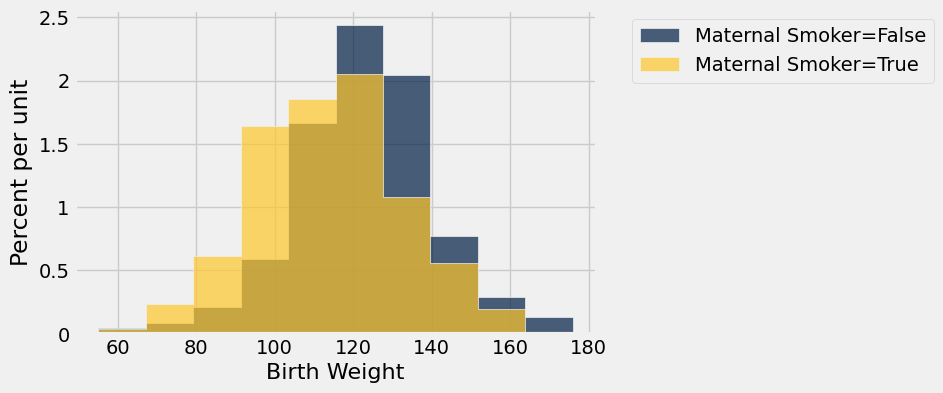

In [5]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

# Test Statistic

**Question:** What values of our statistic are in favor of the alternative: positive or negative?

In [6]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [7]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [8]:
def difference_of_means(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced =  table.select(label,group_label)
    
    # table containing group means
    means_table = reduced.group(group_label,np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1)-means.item(0)

In [9]:
difference_of_means(smoking_and_birthweight, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

# Random Permutation (Shuffling)

In [10]:
letters = Table().with_column('Letter', make_array('a', 'b', 'c', 'd', 'e'))

In [11]:
letters.sample()

Letter
a
a
b
e
c


In [12]:
letters.sample(with_replacement=False)

Letter
e
d
b
c
a


In [14]:
letters.with_column('Shuffled Label',letters.sample(with_replacement=False).column(0))

Letter,Shuffled Label
a,a
b,e
c,b
d,d
e,c


# Simulation Under Null Hypothesis

In [15]:
smoking_and_birthweight

Maternal Smoker,Birth Weight
False,120
False,113
True,128
True,108
False,136
False,138
False,132
False,120
True,143
False,140


In [17]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')
shuffled_labels

array([False, False, False, ..., False,  True, False], dtype=bool)

In [18]:
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label',shuffled_labels)
original_and_shuffled

Maternal Smoker,Birth Weight,Shuffled Label
False,120,False
False,113,False
True,128,False
True,108,False
False,136,True
False,138,True
False,132,False
False,120,True
True,143,False
False,140,True


In [19]:
difference_of_means(original_and_shuffled, 'Birth Weight','Shuffled Label')

0.7751999634352558

In [20]:
observed_statistic = difference_of_means(original_and_shuffled, 'Birth Weight','Maternal Smoker')
observed_statistic

-9.266142572024918

# Permutation Test

In [21]:
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [33]:
one_simulated_difference(smoking_and_birthweight,'Birth Weight','Maternal Smoker')

0.18853085911909773

In [35]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(smoking_and_birthweight, 'Birth Weight','Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


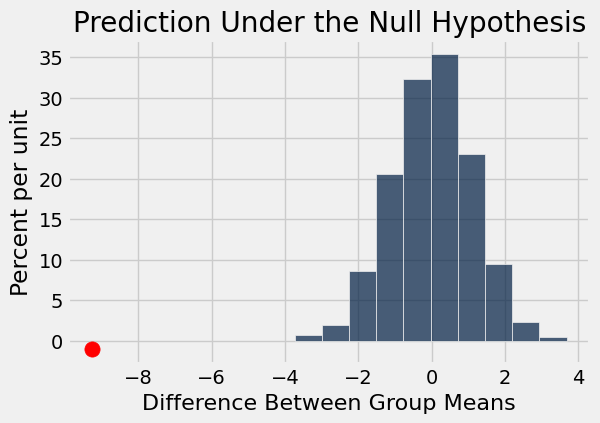

In [36]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');
plots.scatter(observed_statistic, -0.01, color='red', s=120);

In [37]:
# p-value
np.mean(differences <= observed_difference)


0.0

# Randomized Control Experiment

In [ ]:
botox = Table.read_table('bta.csv')
botox.show()

**Question:** In one line of code, how can we figure out how many people in the control and treatment groups experienced pain relief and how many didn't?

In [ ]:
...

**Question:** In one line of code, how can we find the *proportion* of people who experience pain releif in the treatment and control groups?

In [ ]:
...